In [17]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm

import warnings
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing

warnings.filterwarnings('ignore')

#### 差异

In [12]:
a = pd.read_csv('C:/Users/f3107/Desktop/hy_data/2020年1月30日/result.csv',header=None)
a.columns = ['ship_ID','type']
b = pd.read_csv('C:/Users/f3107/Desktop/hy_data/2020年1月30日/result_del_ship.csv',header=None)
b.columns = ['ship_ID','type']

In [18]:
le = preprocessing.LabelEncoder()
le.fit(a.type)
a.type = le.transform(a.type)
b.type = le.transform(b.type)

In [41]:
le.inverse_transform([0,1,2])

array(['刺网', '围网', '拖网'], dtype=object)

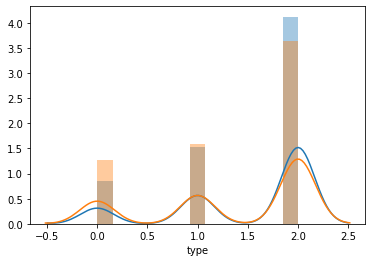

In [20]:
sns.distplot(a.type)
sns.distplot(b.type)

In [21]:
c = pd.merge(a, b, on = 'ship_ID')

In [23]:
c.columns = ['ship_ID','result','result_del_ship']

In [25]:
def function(a, b):
    if a == b:
        return 1
    else:
        return 0

In [26]:
c['bool'] = c.apply(lambda c : function(c['result'],c['result_del_ship']),axis = 1)

In [ ]:
# 0:'刺网', 1:'围网', 2:'拖网'

In [28]:
c[c['bool'] == 0]

,ship_ID,result,result_del_ship,bool
11,7011,2,1,0
12,7012,2,0,0
32,7032,2,0,0
33,7033,2,0,0
59,7059,2,1,0
70,7070,0,1,0
75,7075,2,1,0
85,7085,2,1,0
88,7088,2,0,0
93,7093,2,0,0
